In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## <font color='green'>Importing and Understanding Data:</font>

In [69]:
store = pd.read_csv('SampleSuperstore.csv')
store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [70]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


1. We have 13 features/parameters and 9994 records/samples included in this dataset.
2. As we can see here, there are no null/NaN values.

In [71]:
store.drop('Postal Code', axis=1).describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


1. Average quantity of products purchased is 3.78 rounded off to 4.
2. Maximum amount of sales is 22638.48. Maximum profit generated is 8399.97
3. Maximum loss suffered is of 6599.978

In [72]:
store.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

1. Our data covers the details of sales of 49 US states, 531 cities divided in 4 different regions
2. Store has sold products belonging to 3 different categories in broader term.

In [73]:
store.sort_values(by=['Sales'])[['Sales','Sub-Category']]

,Sales,Sub-Category
4101,0.444,Appliances
9292,0.556,Binders
8658,0.836,Binders
4711,0.852,Binders
2106,0.876,Binders
...,...,...
4190,10499.970,Copiers
2623,11199.968,Copiers
8153,13999.960,Copiers
6826,17499.950,Copiers


## <font color='green'>Data Exploration:</font>

### <font color='blue'>Sales Distribution:</font>

<AxesSubplot:xlabel='Sales'>

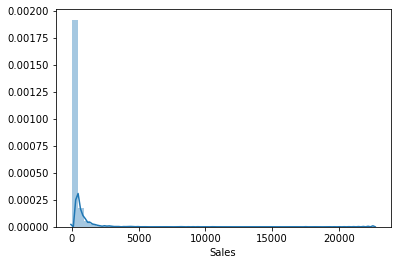

In [74]:
sns.distplot(store.Sales)

### <font color='blue'>Region Wise Analysis:</font>

<AxesSubplot:xlabel='Region'>

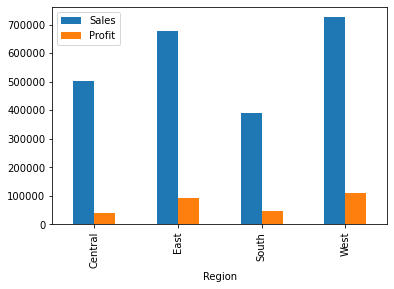

In [75]:
pd.DataFrame(store.groupby('Region').sum()[['Sales','Profit']]).plot(kind='bar')

- Western & Eastern regions have shown higher sales and profits as compared to the Southern and central regions.
- Central region has higher sales than the Southern region but it has shown lower profit gains between the two of them.

### <font color='blue'>State Wise Analysis:</font>

In [76]:
# Top 10 states with maximum number of items sold
store.groupby('State').count()['Quantity'].sort_values(ascending=False)[:10]

State
California        2001
New York          1128
Texas              985
Pennsylvania       587
Washington         506
Illinois           492
Ohio               469
Florida            383
Michigan           255
North Carolina     249
Name: Quantity, dtype: int64

In [77]:
# 10 states with minimum number of items sold
store.groupby('State').count()['Quantity'].sort_values()[:10]

State
Wyoming                  1
West Virginia            4
North Dakota             7
Maine                    8
District of Columbia    10
Vermont                 11
South Dakota            12
Montana                 15
Idaho                   21
Kansas                  24
Name: Quantity, dtype: int64

In [78]:
state_wise_sales = pd.DataFrame(store.groupby('State').sum()['Sales'])
state_wise_sales.reset_index(inplace=True)
state_wise_sales.head()

,State,Sales
0,Alabama,19510.6400
1,Arizona,35282.0010
2,Arkansas,11678.1300
3,California,457687.6315
4,Colorado,32108.1180


In [79]:
import folium
state_geo = 'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json'
m = folium.Map(location=[40, -102], zoom_start=4)

m.choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=state_wise_sales,
    columns=['State','Sales'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Sales'
)
folium.LayerControl().add_to(m)
m

c:\users\saksh\appdata\local\programs\python\python38\lib\site-packages\folium\folium.py:411: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [80]:
# Top 10 stores with maximum amount of sales
print('Top 10 states with maximum amount of sales:\n',store.groupby('State').sum()['Sales'].sort_values(ascending=False)[:10])
print('-'*50)
# Stores with minimum amount of sales
print('States with minimum amount of sales:\n',store.groupby('State').sum()['Sales'].sort_values()[:10])

Top 10 states with maximum amount of sales:
 State
California      457687.6315
New York        310876.2710
Texas           170188.0458
Washington      138641.2700
Pennsylvania    116511.9140
Florida          89473.7080
Illinois         80166.1010
Ohio             78258.1360
Michigan         76269.6140
Virginia         70636.7200
Name: Sales, dtype: float64
--------------------------------------------------
States with minimum amount of sales:
 State
North Dakota             919.910
West Virginia           1209.824
Maine                   1270.530
South Dakota            1315.560
Wyoming                 1603.136
District of Columbia    2865.020
Kansas                  2914.310
Idaho                   4382.486
Iowa                    4579.760
New Mexico              4783.522
Name: Sales, dtype: float64


- The company needs to focuscmore on these 10 states that have least amount of sales. 

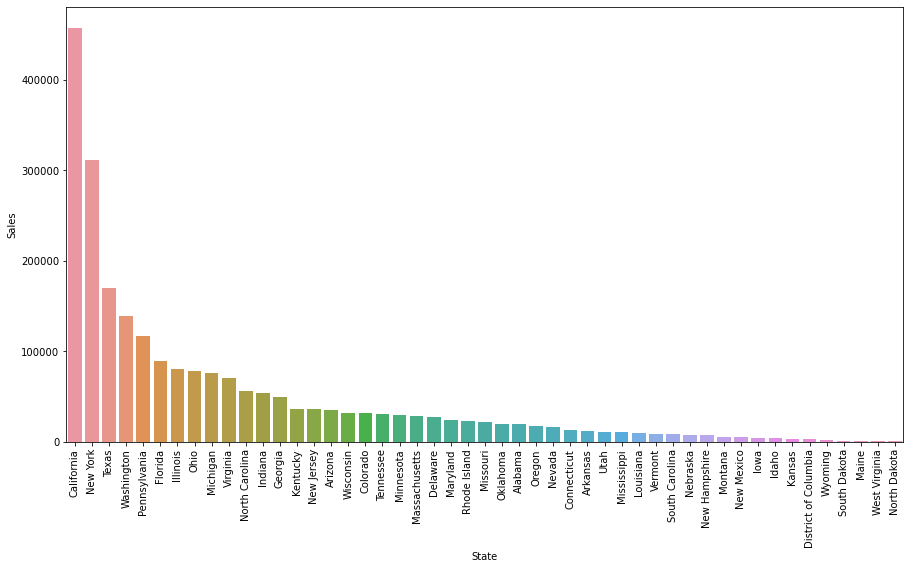

In [81]:
state_wise_sales = pd.DataFrame(store.groupby('State').sum()['Sales']).sort_values(by = 'Sales', ascending=False)
state_wise_sales['State'] = state_wise_sales.index
state_wise_sales.reset_index(drop=True, inplace=True)
plt.figure(figsize=(15,8))
g = sns.barplot(x='State', y='Sales', data=state_wise_sales)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()

- The company has highest sales in the state of California which is around 450k.
- New York is the state that constitutes the second highest sales for the company of around 300k.
- The states of Texas and Washington end up 3rd and 4th on the chart with around 150k and 140k in sales correspondingly.
- Maximum of the sales are done in the west and the east coast regions.

In [82]:
# Top 10 stores with maximum amount of profit
print('Top 10 states with maximum amount of profit:\n',store.groupby('State').sum()['Profit'].sort_values(ascending=False)[:10])
print('-'*50)
# Stores with minimum amount of profit
print('States with minimum amount of profit:\n',store.groupby('State').sum()['Profit'].sort_values()[:10])

Top 10 states with maximum amount of profit:
 State
California    76381.3871
New York      74038.5486
Washington    33402.6517
Michigan      24463.1876
Virginia      18597.9504
Indiana       18382.9363
Georgia       16250.0433
Kentucky      11199.6966
Minnesota     10823.1874
Delaware       9977.3748
Name: Profit, dtype: float64
--------------------------------------------------
States with minimum amount of profit:
 State
Texas            -25729.3563
Ohio             -16971.3766
Pennsylvania     -15559.9603
Illinois         -12607.8870
North Carolina    -7490.9122
Colorado          -6527.8579
Tennessee         -5341.6936
Arizona           -3427.9246
Florida           -3399.3017
Oregon            -1190.4705
Name: Profit, dtype: float64


- This is really a shocking thing as Texas being 3rd in the highest sales (state-wise) chart have resulted in a mounting loss.

### <font color='blue'>City Wise Analysis:</font>

In [83]:
# Top 10 cities with maximum number of items sold
print('Top 10 cities with maximum number of items sold:\n', store.groupby('City').count()['Quantity'].sort_values(ascending=False)[:10])
print('-'*50)
# 10 cities with minimum number of items sold
print('10 cities with minimum number of items sold:\n', store.groupby('City').count()['Quantity'].sort_values()[:10])

Top 10 cities with maximum number of items sold:
 City
New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Houston          377
Chicago          314
Columbus         222
San Diego        170
Springfield      163
Name: Quantity, dtype: int64
--------------------------------------------------
10 cities with minimum number of items sold:
 City
Aberdeen        1
Ontario         1
Davis           1
Orland Park     1
Danbury         1
Ormond Beach    1
Iowa City       1
Pensacola       1
Conway          1
Conroe          1
Name: Quantity, dtype: int64


In [84]:
# Top 10 stores with maximum amount of sales
print('Top 10 cities with maximum amount of sales:\n',store.groupby('City').sum()['Sales'].sort_values(ascending=False)[:10])
print('-'*50)
# Stores with minimum amount of sales
print('10 cities with minimum amount of sales:\n',store.groupby('City').sum()['Sales'].sort_values()[:10])

Top 10 cities with maximum amount of sales:
 City
New York City    256368.1610
Los Angeles      175851.3410
Seattle          119540.7420
San Francisco    112669.0920
Philadelphia     109077.0130
Houston           64504.7604
Chicago           48539.5410
San Diego         47521.0290
Jacksonville      44713.1830
Springfield       43054.3420
Name: Sales, dtype: float64
--------------------------------------------------
10 cities with minimum amount of sales:
 City
Abilene            1.392
Elyria             1.824
Jupiter            2.064
Pensacola          2.214
Ormond Beach       2.808
San Luis Obispo    3.620
Springdale         4.300
Layton             4.960
Keller             6.000
Missouri City      6.370
Name: Sales, dtype: float64


In [85]:
# Top 10 stores with maximum amount of profit
print('Top 10 cities with maximum amount of profit:\n',store.groupby('City').sum()['Profit'].sort_values(ascending=False)[:10])
print('-'*50)
# Stores with minimum amount of profit
print('10 cities with minimum amount of profit:\n',store.groupby('City').sum()['Profit'].sort_values()[:10])

Top 10 cities with maximum amount of profit:
 City
New York City    62036.9837
Los Angeles      30440.7579
Seattle          29156.0967
San Francisco    17507.3854
Detroit          13181.7908
Lafayette        10018.3876
Jackson           7581.6828
Atlanta           6993.6629
Minneapolis       6824.5846
San Diego         6377.1960
Name: Profit, dtype: float64
--------------------------------------------------
10 cities with minimum amount of profit:
 City
Philadelphia   -13837.7674
Houston        -10153.5485
San Antonio     -7299.0502
Lancaster       -7239.0684
Chicago         -6654.5688
Burlington      -3622.8772
Dallas          -2846.5257
Phoenix         -2790.8832
Aurora          -2691.7386
Jacksonville    -2323.8350
Name: Profit, dtype: float64


- Company must focus on these cities which have resulted in loss. 
- They should analyse their resource usage and resource needs to make it balanced.
- Use particular pricing strategies.

### <font color='blue'>Category Wise Analysis:</font>

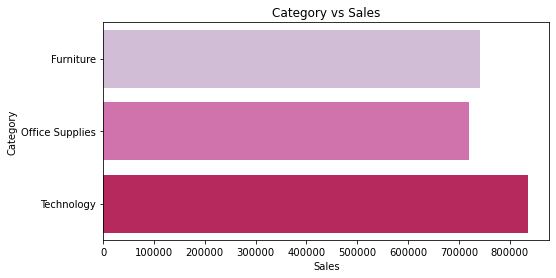

In [86]:
category_wise_sales = pd.DataFrame(store.groupby('Category').sum()['Sales'])
category_wise_sales.reset_index(inplace=True)
plt.figure(figsize=(8,4))
sns.barplot(x = 'Sales', y = 'Category', data = category_wise_sales, palette = 'PuRd', orient = 'h')
plt.title('Category vs Sales')
plt.show()

- The company has its highest sales in the Tech category products

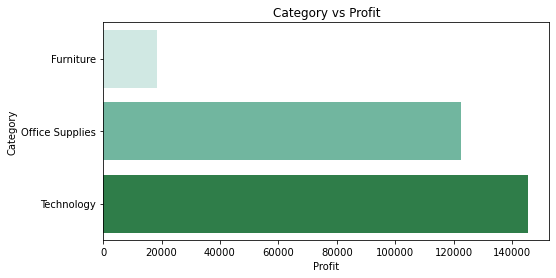

In [87]:
category_wise_profit = pd.DataFrame(store.groupby('Category').sum()['Profit'])
category_wise_profit.reset_index(inplace=True)
plt.figure(figsize=(8,4))
sns.barplot(x = 'Profit', y = 'Category', data = category_wise_profit, palette = 'BuGn', orient = 'h')
plt.title('Category vs Profit')
plt.show()

- Technology category products have generated highest profit.
- Furniture category products have sales equivalent to that of office supplies but have profits way less than it.

### <font color='blue'>Sub Category Wise Analysis:</font>

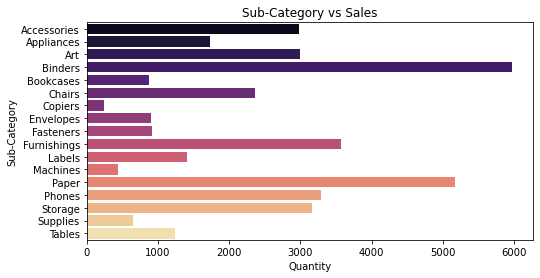

In [88]:
subcategory_wise_quantity = pd.DataFrame(store.groupby('Sub-Category').sum()['Quantity'])
subcategory_wise_quantity.reset_index(inplace=True)
plt.figure(figsize=(8,4))
sns.barplot(x = 'Quantity', y = 'Sub-Category', data = subcategory_wise_quantity, palette = 'magma', orient = 'h')
plt.title('Sub-Category vs Sales')
plt.show()

- Binders are the highest selling products. Around 6000 products are sold.
- Copiers, Machines and Supplies being the least selling products.

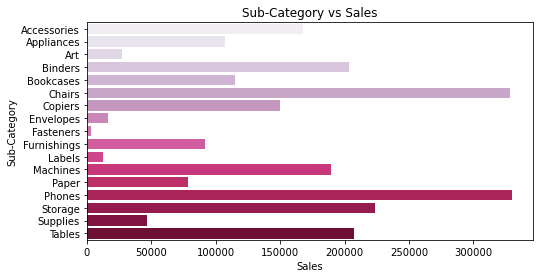

In [89]:
subcategory_wise_sales = pd.DataFrame(store.groupby('Sub-Category').sum()['Sales'])
subcategory_wise_sales.reset_index(inplace=True)
plt.figure(figsize=(8,4))
sns.barplot(x = 'Sales', y = 'Sub-Category', data = subcategory_wise_sales, palette = 'PuRd', orient = 'h')
plt.title('Sub-Category vs Sales')
plt.show()

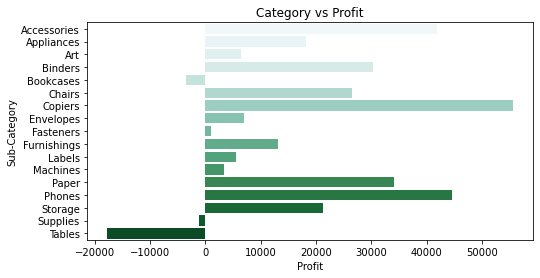

In [90]:
subcategory_wise_profit = pd.DataFrame(store.groupby('Sub-Category').sum()['Profit'])
subcategory_wise_profit.reset_index(inplace=True)
plt.figure(figsize=(8,4))
sns.barplot(x = 'Profit', y = 'Sub-Category', data = subcategory_wise_profit, palette = 'BuGn', orient = 'h')
plt.title('Category vs Profit')
plt.show()

- Sub-Categories Tables, Bookcases, and Supplies has resulted in loss. These are the products that needs to be focused.

### <font color='blue'>Category-wise sub-category-wise analysis:</font>

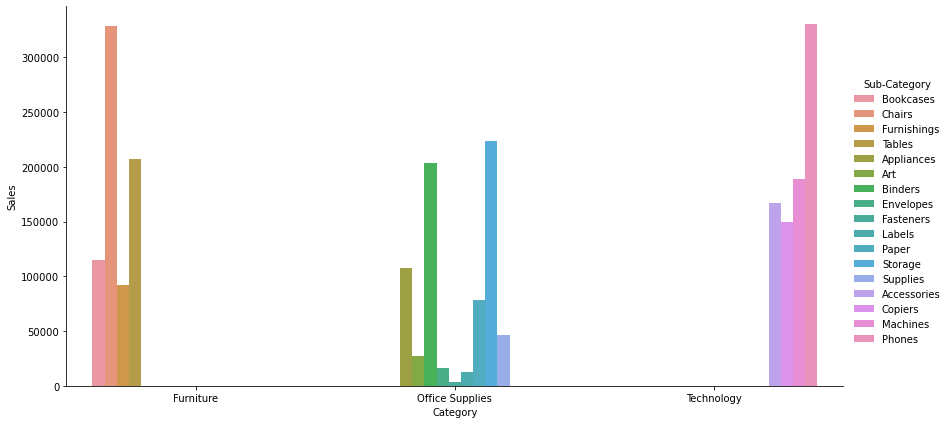

In [91]:
categories_products_sales = pd.DataFrame(store.groupby(['Category','Sub-Category']).sum()[['Sales']])
categories_products_sales.reset_index(inplace=True)
sns.catplot(kind='bar', x='Category', y='Sales', data=categories_products_sales, hue='Sub-Category', height=6, aspect=2)

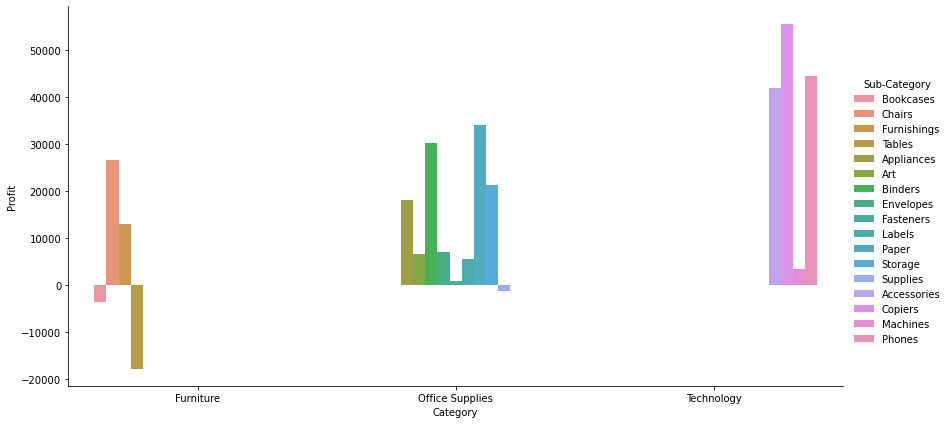

In [92]:
categories_products_profit = pd.DataFrame(store.groupby(['Category','Sub-Category']).sum()[['Profit']])
categories_products_profit.reset_index(inplace=True)
sns.catplot(kind='bar', x='Category', y='Profit', data=categories_products_profit, hue='Sub-Category', height=6, aspect=2)

### <font color='blue'>Products sold in the states with highest sales:</font>

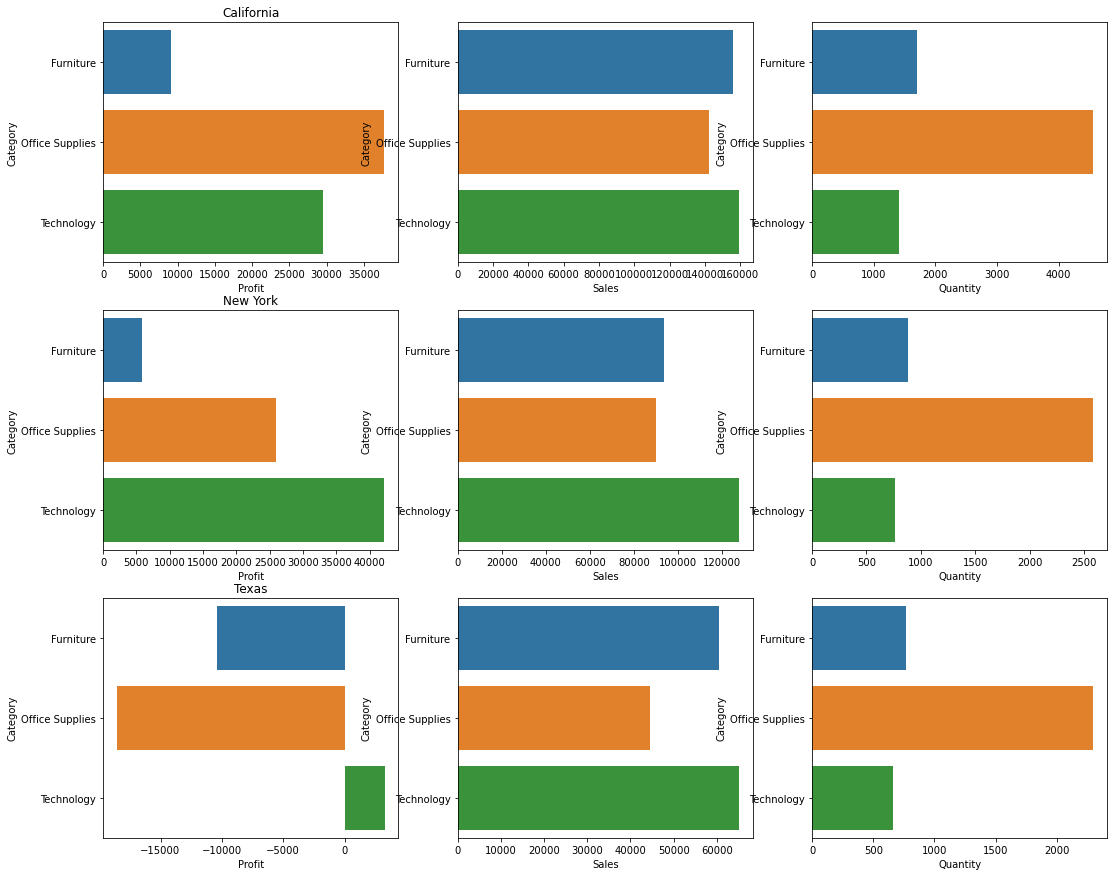

In [93]:
california = store[store['State']=='California'].groupby('Category').sum()
california.reset_index(inplace=True)
texas = store[store['State']=='Texas'].groupby('Category').sum()
texas.reset_index(inplace=True)
new_york = store[store['State']=='New York'].groupby('Category').sum()
new_york.reset_index(inplace=True)
# top_states = ['California','Texas','New York']
# parameters = ['Quantity','Sales','Profit']
plt.subplots(figsize=(18,15))
# k=0
# for i in top_states:
#     for j in parameters:
#         k+=1
plt.subplot(3,3,1)
sns.barplot(x='Profit', y='Category', data=california, orient='h')
plt.title('California')
plt.subplot(332)
sns.barplot(x='Sales', y='Category', data=california, orient='h')
plt.subplot(333)
sns.barplot(x='Quantity', y='Category', data=california, orient='h')
plt.subplot(334)
sns.barplot(x='Profit', y='Category', data=new_york, orient='h')
plt.title('New York')
plt.subplot(335)
sns.barplot(x='Sales', y='Category', data=new_york, orient='h')
plt.subplot(336)
sns.barplot(x='Quantity', y='Category', data=new_york, orient='h')
plt.subplot(337)
sns.barplot(x='Profit', y='Category', data=texas, orient='h')
plt.title('Texas')
plt.subplot(338)
sns.barplot(x='Sales', y='Category', data=texas, orient='h')
plt.subplot(339)
sns.barplot(x='Quantity', y='Category', data=texas, orient='h')
plt.show()

- Here we can see that in California, all 3 segments have similar sales but office supplies has gained the highest profit.
- In the state of New York, again all 3 segments have similar quantity of sales. Technology gained highest profit.
- Texas have faced massive losses in both Furniture and Office Suppies categories.
- Tech sector products have the highest amount of sales as well as a good total of profit.
- The company really needs to focus on the products beloging to the Furniture sector.

### <font color='blue'>Segment Wise Analysis:</font>

<ipython-input-94-370a9ca5415e>:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


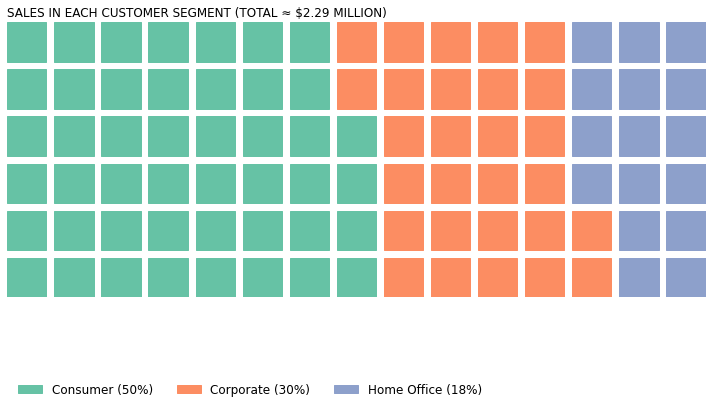

In [94]:
total = store[['Segment','Sales']].groupby('Segment').sum()
from pywaffle import Waffle
values = {i:j for i,j in zip(total.index.values, total.Sales.values)}
fig = plt.figure(
    FigureClass=Waffle,
    rows=6,
    columns=15,
    figsize=(10,10),
    values=values,
    title={'label': 'Sales in Each Customer Segment (Total ≈ $2.29 million)'.upper(), 'loc': 'left'},
    legend={
        'labels': [f"{k} ({int(v/sum(values.values())*100)}%)" for k, v in values.items()],  # lebels could also be under legend instead
        'loc': 'lower left',
        'bbox_to_anchor': (0, -0.4),
        'ncol': len(total),
        'framealpha': 0,
        'fontsize': 12
    }
)
fig.show()

<AxesSubplot:title={'center':'Profit Generated from Different Segments'}, xlabel='Segment', ylabel='Profit'>

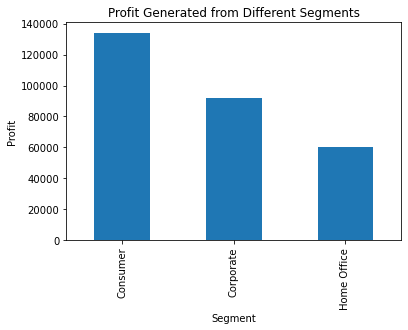

In [95]:
store.groupby('Segment')['Profit'].sum().plot(kind='bar', title='Profit Generated from Different Segments', ylabel='Profit')

- Consumer have been the major segment with sales of 5k and with a profit of 140k approx. for the company.
- Home Office segment has the least sales and profit.

<AxesSubplot:xlabel='Segment', ylabel='count'>

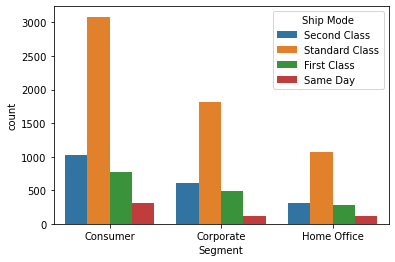

In [96]:
sns.countplot(x='Segment', hue='Ship Mode', data=store)

- Standard shiping mode is the common preffered choice for all the segments.
- Very few people avail for same day shiping.

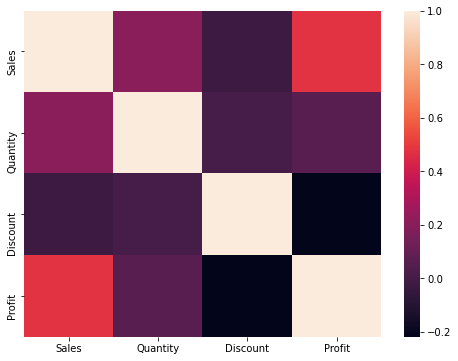

In [97]:
plt.figure(figsize=(8,6))
sns.heatmap(store.drop('Postal Code',axis=1).corr())
plt.show()

- We can see here that there is a positive relationship between sales and profit.
- There is a negative relationship between profit and discount.

### Sales vs Profit:
State wise sales vs profit

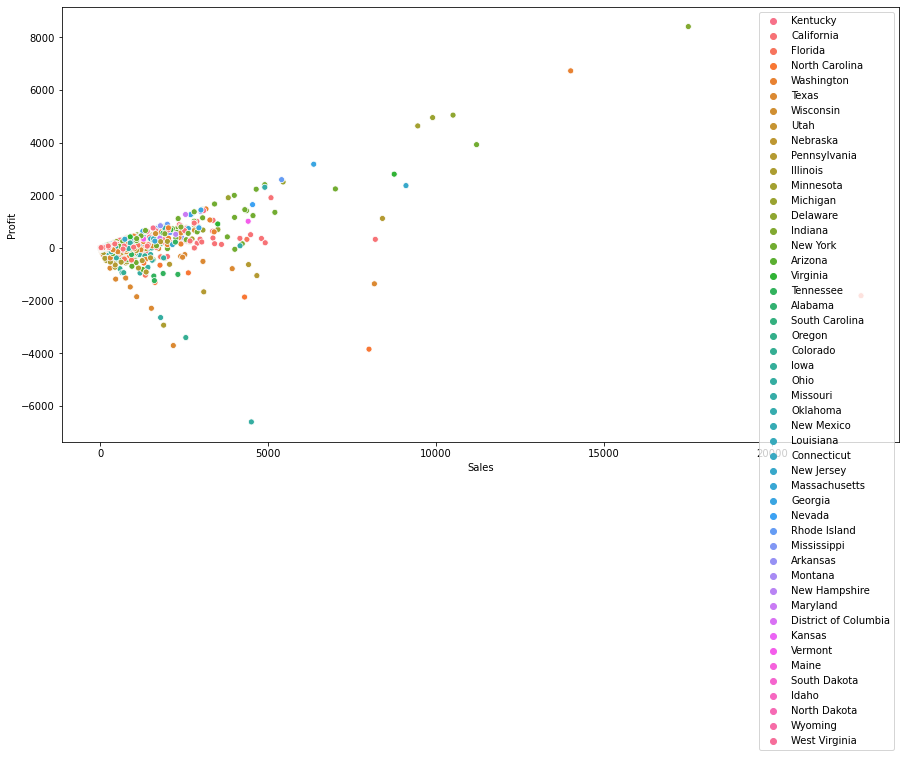

In [98]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Sales', y='Profit', data=store, hue=store.State.tolist())
plt.legend(loc='best')
plt.show()

- The above graph shows the sales to profit relationship for each state. Profit increases with sales in most of the cases except for some points.

### <font color='blue'>Profit to Sales Ratio:</font>

In [99]:
profit_to_sales = pd.DataFrame(store.groupby('State').sum()[['Sales','Profit']])
profit_to_sales['Profit_to_sales'] = profit_to_sales['Profit']/profit_to_sales['Sales']
profit_to_sales.sort_values(by='Profit_to_sales', inplace=True, ascending=False)
profit_to_sales.head(10), profit_to_sales.tail()

(                          Sales      Profit  Profit_to_sales
 State                                                       
 District of Columbia   2865.020   1059.5893         0.369837
 Delaware              27451.069   9977.3748         0.363460
 Minnesota             29863.150  10823.1874         0.362426
 Maine                  1270.530    454.4862         0.357714
 Arkansas              11678.130   4008.6871         0.343264
 Indiana               53555.360  18382.9363         0.343251
 Georgia               49095.840  16250.0433         0.330986
 Montana                5589.352   1833.3285         0.328004
 Rhode Island          22627.956   7285.6293         0.321975
 Michigan              76269.614  24463.1876         0.320746,
                  Sales      Profit  Profit_to_sales
 State                                              
 Texas      170188.0458 -25729.3563        -0.151182
 Illinois    80166.1010 -12607.8870        -0.157272
 Tennessee   30661.8730  -5341.6936        

- Ohio has the worst profit to sales ratio.
- District of Columbia has the highest profit to sales ratio.
- The states California, New York doesn't come in the list of top 10 states with highest profit to sales ratio that means there is still some room for improvement.